In [7]:
class AdalineGD(object):
    """
    Adaptive LInear NEuron Classifier
    
    Parameters
    -----------
    eta : fload - Learning rate (0.0 - 1.0)
    n_iter : init - Passes over the training dataset.
    random_state : int - Random number generator seed for random weight initialization 
    
    Attributes
    ---------------
    w_ : 1d-array - Weights after fitting
    cost_ : list - Sum of squares cost function value in each epoch
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        Fit training data.
        
        Parameters
        ------------
        X: {array-like} , shape = [n_samples, n_features]
           Traning vectors, where n_samples is number of samples and n_features is number of features
        y: array-like , shape [n_samples]
           Target values
           
        Returns
        ----------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors) #Xtranspose dot
            self.w_[0] += self.eta * errors.sum()
            cost = (errors **2).sum() /2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """
        Calculate net input 
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """
        Compute linear activation
        """
        return X
    
    def predict(self, X):
        """
        Return Class label after unit step
        """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        
        

NameError: name 'X' is not defined

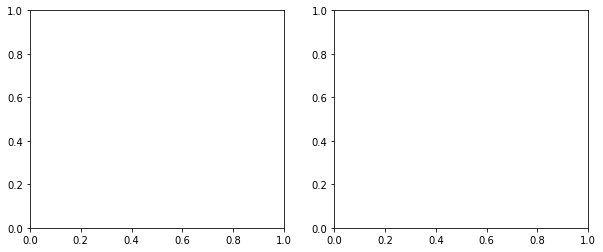

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_),
           marker = 'o'
          )
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')